# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [27]:
heroes_df = pd.read_csv('heroes_information.csv')
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [28]:
powers_df = pd.read_csv('super_hero_powers.csv')
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [29]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [30]:
heroes_df.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


In [31]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Blink,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
_____________________________________________________________________________________________________________________

Using the .isna() function, I detected that the heroes data frame is missing values in the publisher columns and the weight columns. Upon further investigation using the .sum() function, I detected there are 15 missing publisher values and only 2 missing weight values. Since the weight columns are numeric (float64) and only 2 values are missing, I will take the average of the heroes weights and replace these missing values with it. Since the publisher values are non-numeric (object) it is harder to replace. For now, I will leave the values as is since it will have little impact on the analysis and because I do not want to drop all 15 rows as they may contain important information. 

In [32]:
heroes_df.isna().any()

Unnamed: 0    False
name          False
Gender        False
Eye color     False
Race          False
Hair color    False
Height        False
Publisher      True
Skin color    False
Alignment     False
Weight         True
dtype: bool

In [33]:
heroes_df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [34]:
heroes_df.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [35]:
mean_weight = np.mean(heroes_df.Weight)
heroes_df['Weight'].fillna(mean_weight, inplace = True)
heroes_df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [36]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [38]:
powers_df.rename(columns={'hero_names':'name'}, inplace=True)
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
powers_df  = powers_df.astype('str')

In [40]:
heroes_df.isna().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         0
dtype: int64

In [41]:
heroes_and_powers_df = powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Unnamed: 0,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,0,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,1,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,2,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,False,True,False,False,False,False,False,False,False,False,...,3,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,False,False,False,True,False,False,False,False,True,False,...,4,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [42]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']

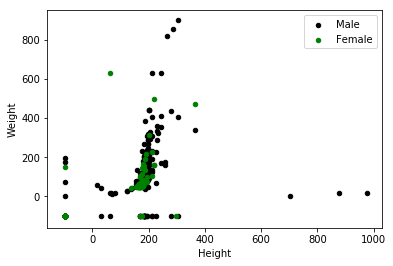

In [43]:
ax1 = plt.subplot(1, 1, 1)

male_heroes_df.plot(kind = 'scatter', x = 'Height', y = 'Weight', color = 'k', ax = ax1, label = 'Male')
female_heroes_df.plot(kind = 'scatter', x = 'Height', y = 'Weight', color = 'green', ax = ax1, label = 'Female')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [253]:

def show_distplot(dataframe, gender, column_name):
    plt.plot()
    sns.distplot(dataframe[column_name])
    plt.title("Distribution of {} for {} heroes".format(column_name, gender))
    plt.xlabel(column_name)
    plt.ylabel("Probability Density")
    plt.show()
    

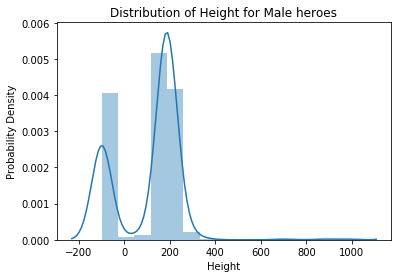

Mean Height for male heroes: 107.27524752475247
Median Height for male heroes: 180.0


In [254]:
show_distplot(male_heroes_df, 'Male', 'Height')
print("Mean Height for male heroes: {}".format(np.mean(male_heroes_df.Height)))
print("Median Height for male heroes: {}".format(np.median(male_heroes_df.Height)))

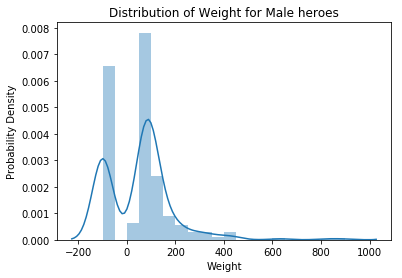

Mean Weight for male heroes: 52.03535681436996
Median Weight for male heroes: 79.0


In [268]:
show_distplot(male_heroes_df, 'Male', 'Weight')
print("Mean Weight for male heroes: {}".format(np.mean(male_heroes_df.Weight)))
print("Median Weight for male heroes: {}".format(np.median(male_heroes_df.Weight)))

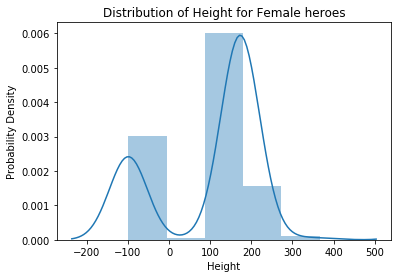

Mean Height for female heroes: 98.0525
Median Height for female heroes: 168.0


In [269]:
show_distplot(female_heroes_df, 'Female', 'Height')
print("Mean Height for female heroes: {}".format(np.mean(female_heroes_df.Height)))
print("Median Height for female heroes: {}".format(np.median(female_heroes_df.Height)))


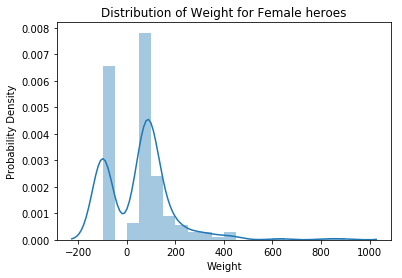

Mean Weight for female heroes: 27.265
Median Weight for female heroes: 54.0


In [270]:
show_distplot(male_heroes_df, 'Female', 'Weight')
print("Mean Weight for female heroes: {}".format(np.mean(female_heroes_df.Weight)))
print("Median Weight for female heroes: {}".format(np.median(female_heroes_df.Weight)))

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
_____________________________________________________________________________________________________________________

All 4 graphs show two modes each with large discrepencies between the mean and median calculations. It may be a super power to have a negative weight and height, but makes analyzing the data difficult. The mean weight for males is 52 while the mean weight for femails is 27. The mean height for males and the mean height for females is 107 and 98 respectively. The comparisions of means shows that on average males are taller and heavier than females heroes. 



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [44]:
# What are the 5 most common powers overall?

original_powers_df = pd.read_csv('super_hero_powers.csv')
original_powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
count_dict = {}
for column in original_powers_df:
    if original_powers_df[column].dtype == bool:
        #print(column + ' ' + str(original_powers_df[column].sum()))
        count_dict[column] = original_powers_df[column].sum()

In [46]:
count_df = pd.DataFrame(count_dict, index = ['Counts'])
count_df = count_df.T

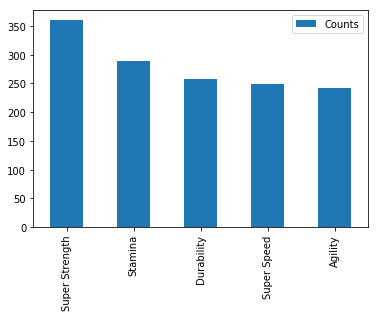

In [47]:
count_df.sort_values('Counts', ascending = False).head().plot(kind = 'bar')

# The top 5 most common super powers overall are Super Strength, Stamina, Durability, Super Speed and Agility.

In [48]:
# What are the 5 most common powers in the Marvel Universe?

joined_df = original_powers_df.join(heroes_df, how='inner')

marvel_df = joined_df[joined_df['Publisher'] == 'Marvel Comics']

marvel_dict = {}
for column in marvel_df.columns:
    if marvel_df[column].dtype == bool:
        marvel_dict[column] = marvel_df[column].sum()

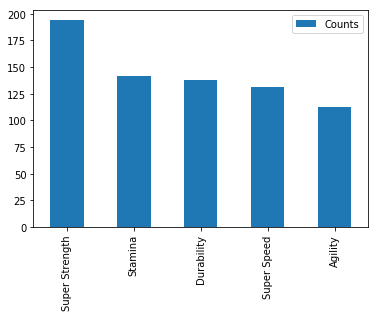

In [49]:
marvel_counts_df = pd.DataFrame(marvel_dict, index = ['Counts'])
marvel_counts_df = marvel_counts_df.T

marvel_counts_df.sort_values('Counts', ascending = False).head().plot(kind = 'bar')

# The top 5 most common super powers in the Marvel Universe are Super Strength, Stamina, Durability, Super Speed and Agility.

In [50]:
# What are the 5 most common powers in the DC Univsere?
dc_df = joined_df[joined_df['Publisher'] == 'DC Comics']

dc_dict = {}
for column in dc_df.columns:
    if dc_df[column].dtype == bool:
        dc_dict[column] = dc_df[column].sum()

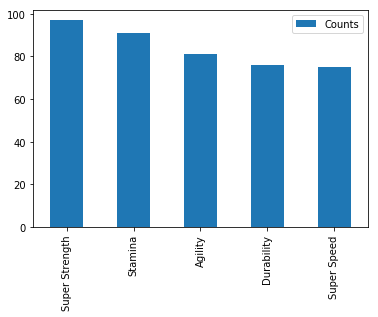

In [51]:
dc_counts_df = pd.DataFrame(dc_dict, index = ['Counts'])
dc_counts_df = dc_counts_df.T

dc_counts_df.sort_values('Counts', ascending = False).head().plot(kind = 'bar')

# The top 5 most common super powers in the DC Universe are Super Strength, Stamina, Agility, Durability and Super Speed.

Text(0.5, 1.0, 'DC')

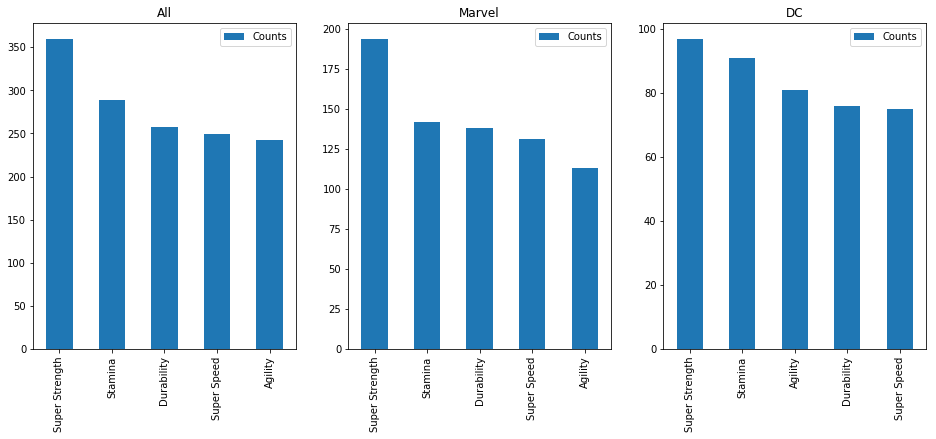

In [52]:
fig = plt.figure(figsize = (16, 6))

ax1 = plt.subplot(1, 3, 1)
count_df.sort_values('Counts', ascending = False).head().plot(kind = 'bar', ax = ax1)
plt.title('All')

ax2 = plt.subplot(1, 3, 2)
marvel_counts_df.sort_values('Counts', ascending = False).head().plot(kind = 'bar', ax = ax2)
plt.title('Marvel')

ax3 = plt.subplot(1, 3, 3)
dc_counts_df.sort_values('Counts', ascending = False).head().plot(kind = 'bar', ax = ax3)
plt.title('DC')

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [53]:
# How is Super Strength distributed amoung male and female super heroes?

original_powers_df.rename(columns={'hero_names':'name'}, inplace=True)
original_powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
heroes_and_powers_df2 = original_powers_df.set_index('name').join(heroes_df.set_index('name'), how='inner')
heroes_and_powers_df2.tail()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Unnamed: 0,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,,,,,,,,,,,,,
Yellowjacket II,False,False,False,False,False,False,False,False,True,False,...,729,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
Ymir,False,False,False,False,True,True,False,False,False,False,...,730,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
Yoda,True,False,False,False,False,False,True,False,False,True,...,731,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
Zatanna,False,False,False,False,False,False,False,False,False,False,...,732,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0
Zoom,False,False,False,False,False,False,False,False,False,False,...,733,Male,red,-,Brown,185.0,DC Comics,-,bad,81.0


In [55]:
male_strength_df = heroes_and_powers_df.loc[(heroes_and_powers_df['Gender'] =='Male') & (heroes_and_powers_df['Super Strength'] =='True')]
male_super_strength_df = male_strength_df.loc[:,['Gender', 'Super Strength']]
male_super_strength_df.head()


,Gender,Super Strength
name,,
A-Bomb,Male,True
Abe Sapien,Male,True
Abomination,Male,True
Abraxas,Male,True
Absorbing Man,Male,True


In [56]:
male_count = male_super_strength_df['Super Strength'].count()
male_count

263

In [61]:
female_strength_df = heroes_and_powers_df.loc[(heroes_and_powers_df['Gender'] =='Female') & (heroes_and_powers_df['Super Strength'] =='True')]
female_super_strength_df = female_strength_df.loc[:,['Gender', 'Super Strength']]
female_super_strength_df.head()


,Gender,Super Strength
name,,
Angel Dust,Female,True
Arachne,Female,True
Arclight,Female,True
Ardina,Female,True
Armor,Female,True


# I THINK THE PROBLEM IS HERE. 

In [63]:
female_super_strength_df.dtypes

Gender            object
Super Strength    object
dtype: object

# BECAUSE I HAVE AN OBJECT, I TRY TO CONVERT IT TO AN INT64 HERE:

In [67]:
female_count = female_super_strength_df['Super Strength'].count()
female_count

88

# NEXT I CREATE A DATA FRAME TO BETTER PLOT

In [59]:
df = pd.DataFrame({'Heroes':['Male', 'Female'], 'val':[263, 88]})

# THERE MUST BE A BETTER WAY TO PLOT THIS
### sadly it too me forever to get this plot and I am very unhappy with how it looks.

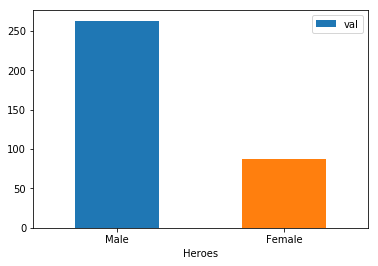

In [69]:
ax = df.plot.bar(x='Heroes', y='val', rot=0)


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data